In [50]:
import pandas as pd
import sklearn.metrics as met
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import statistics
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

# Binary Prediction of Gentrified Tracts in Melbourne

This noteboke containes the Feed-Forward Neural Networks (FFNN) used to model a binary classification problem about transit-induced gentrification in Melbourne. There are two gentrification periods to be analysed: 2006-2016 and 2011-2016. The training labels were obtained following Freeman's 5-step definition of gentrified areas.

The evaluation process is centered around Recall. In order to do wo while preventing the models from predicting all instances as positive, the main metric is F2 with recall being twice as aimportant as precision.

# Table of Contents

1. [Models for 2006-2016 Gentrification Period](#2006_2016_model)

2. [Models for 2011-2016 Gentrification Period](#2011_2016_model)

In [51]:
# Function to print evaluation metrics

def print_metrics(model, y_test, X_test, name='model'):
    f2 = met.fbeta_score(y_test, model.predict(X_test), beta=2)
    print('F2: {}'.format(round(f2,3)))
    recall = met.recall_score(y_test, model.predict(X_test))
    print('Recall: {}'.format(round(recall,3)))
    precision = met.precision_score(y_test, model.predict(X_test))
    print('Precision: {}'.format(round(precision,3)))
    acc = met.accuracy_score(y_test, model.predict(X_test))
    print('Accuracy: {}'.format(round(acc,3)))

In [52]:
# Function to plot Precision-Recall Curve

def plot_PRC(y_test, y_prob, name='model'):
    precision, recall, thresholds = met.precision_recall_curve(y_test, y_prob)
    pr_auc = met.auc(recall, precision)
    print('The PR-AUC: ' + str(round(pr_auc,3)))
    # plot the precision-recall curves
    no_skill = len(y_test[y_test==True]) / len(y_test)
    plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    plt.plot(recall, precision, marker='.', label=name)
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim(0,1)
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

In [53]:
# Plot results used to calculate the grand mean of metrics

def plot_series(met_list, name='metric'):
  mean = statistics.mean(met_list)
  plt.plot([0, len(met_list)], [mean, mean], linestyle='--', label='mean')
  plt.plot(met_list, label='series')
  plt.xlabel('series')
  plt.ylabel(name)
  plt.ylim(0,1)
  plt.show

  print('The variance is: ' + str(np.var(met_list)))

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##  2006-2016 Gentrification Period <a name='2006_2016_model'></a>

In [55]:
reduced_06_16 = pd.read_csv('drive/MyDrive/dataset_reduced_06_16.csv')
complete_06_16 = pd.read_csv('drive/MyDrive/dataset_complete_06_16.csv')

In [56]:
# Normalize dataset
scaler_R = preprocessing.MinMaxScaler()
X_06R = reduced_06_16.drop(columns = ['Unnamed: 0','SA1_MAINCO','Gentrified_06_16'], axis=1)
X_06R[X_06R.columns] = scaler_R.fit_transform(X_06R)
                                               
scaler_C = preprocessing.MinMaxScaler()
X_06C = complete_06_16.drop(columns = ['Unnamed: 0','SA1_MAINCO','Gentrified_06_16'], axis=1)
X_06C[X_06C.columns] = scaler_C.fit_transform(X_06C)

# Split dataset
X_06R_select, X_06R_test, y_06R_select, y_06R_test = train_test_split(X_06R,
                                                                      reduced_06_16['Gentrified_06_16'], 
                                                                      test_size=0.10,
                                                                      random_state=0)
X_06R_train, X_06R_val, y_06R_train, y_06R_val = train_test_split(X_06R_select,
                                                                  y_06R_select, 
                                                                  test_size=0.111,
                                                                  random_state=0)

X_06C_select, X_06C_test, y_06C_select, y_06C_test = train_test_split(X_06C,
                                                                      complete_06_16['Gentrified_06_16'], 
                                                                      test_size=0.10,
                                                                      random_state=0)
X_06C_train, X_06C_val, y_06C_train, y_06C_val = train_test_split(X_06C_select,
                                                                  y_06C_select, 
                                                                  test_size=0.111,
                                                                  random_state=0)

In [57]:
# Class wights fixed to the proportion of positives and negtives

y_06 = reduced_06_16['Gentrified_06_16']
int_ratio_06 = round(100*len(y_06[y_06 == True])/ len(y_06))

cw_06 = {False: int_ratio_06, True: 100-int_ratio_06}

In [58]:
# metrics

metrics = [tf.keras.metrics.Recall(),
           tf.keras.metrics.Accuracy(),
           tf.keras.metrics.Precision(),
           ]

FFNN trained and configured with a reduced number of demographic features.


Epoch 00001: val_loss improved from inf to 0.51969, saving model to best_model.h5

Epoch 00002: val_loss did not improve from 0.51969

Epoch 00003: val_loss did not improve from 0.51969

Epoch 00004: val_loss did not improve from 0.51969

Epoch 00005: val_loss did not improve from 0.51969

Epoch 00006: val_loss did not improve from 0.51969

Epoch 00007: val_loss did not improve from 0.51969

Epoch 00008: val_loss did not improve from 0.51969

Epoch 00009: val_loss did not improve from 0.51969

Epoch 00010: val_loss did not improve from 0.51969

Epoch 00011: val_loss did not improve from 0.51969

Epoch 00012: val_loss did not improve from 0.51969

Epoch 00013: val_loss improved from 0.51969 to 0.50210, saving model to best_model.h5

Epoch 00014: val_loss did not improve from 0.50210

Epoch 00015: val_loss did not improve from 0.50210

Epoch 00016: val_loss did not improve from 0.50210

Epoch 00017: val_loss improved from 0.50210 to 0.50154, saving model to best_model.h5

Epoch 00018: v

<function matplotlib.pyplot.show>

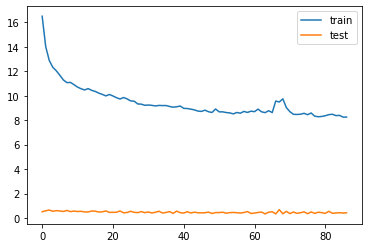

In [59]:
from keras.callbacks import EarlyStopping
from keras.models import load_model

model_06R = Sequential()
model_06R.add(Dense(105, input_dim = X_06R_train.shape[1], activation='selu'))
model_06R.add(Dense(105, activation='selu'))
model_06R.add(Dropout(0.3))
model_06R.add(Dense(105, activation='selu'))
model_06R.add(Dropout(0.3))
model_06R.add(Dense(105, activation='selu'))
model_06R.add(Dense(1, activation='sigmoid'))

model_06R.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=metrics,)


es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = tf.keras.callbacks.ModelCheckpoint('best_model.h5', 
                                        monitor='val_loss', 
                                        mode='min', 
                                        verbose=1, 
                                        save_best_only=True)

history_06R = model_06R.fit(x=X_06R_train, 
                    y=y_06R_train, 
                    validation_data=(X_06R_val, y_06R_val),
                    epochs=300,
                    batch_size=2000,
                    class_weight=cw_06,
                    verbose=0,
                    callbacks=[es, mc]
                    )

saved_model_06R = load_model('best_model.h5')

plt.plot(history_06R.history['loss'], label='train')
plt.plot(history_06R.history['val_loss'], label='test')
plt.legend()
plt.show

The PR-AUC: 0.423


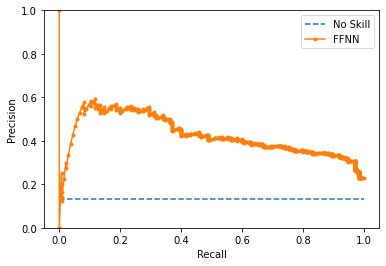

In [60]:
plot_PRC(y_06R_test,saved_model_06R.predict( X_06R_test), name='FFNN')

The eventhough the validation loss doesnt seem to decrease after the first epochs, the early-stopping callback shows the right moment to stop the training with the given patience.

F2: 0.7304919664129482
recall: 0.8234567901234567
precision: 0.5361547798861023
accuracy: 0.8702947845804988
The variance is: 0.0013030428853787466


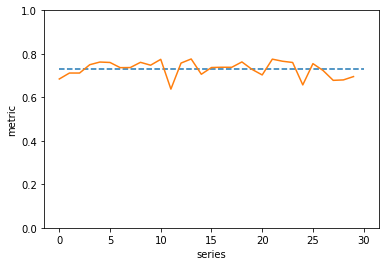

In [37]:
model = Sequential()
model.add(Dense(105, input_dim = X_06R_train.shape[1], activation='selu'))
model.add(Dense(105, activation='selu'))
model.add(Dropout(0.4))
model.add(Dense(105, activation='selu'))
model.add(Dropout(0.4))
model.add(Dense(105, activation='selu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=metrics,)

precision_06R = []
acc_06R = []
f2_06R = []
recall_06R = []
for i in range(30):

  history = model.fit(x=X_06R_select, 
                    y=y_06R_select, 
                    epochs=50,
                    batch_size=2000,
                    class_weight=cw_06,
                    verbose=0)
                    
  f2_06R.append(met.fbeta_score(y_06R_test, model.predict(X_06R_test).round(), beta=2))
  recall_06R.append(met.recall_score(y_06R_test, model.predict(X_06R_test).round()))
  precision_06R.append(met.precision_score(y_06R_test, model.predict(X_06R_test).round()))
  acc_06R.append(met.accuracy_score(y_06R_test, model.predict(X_06R_test).round()))

print('F2: ' + str(statistics.mean(f2_06R)))
print('recall: ' + str(statistics.mean(recall_06R)))
print('precision: ' + str(statistics.mean(precision_06R)))
print('accuracy: ' + str(statistics.mean(acc_06R)))

plot_series(f2_06R)

FFNN trained and configured with all demographic features.


Epoch 00001: val_loss improved from inf to 0.37994, saving model to best_model.h5

Epoch 00002: val_loss did not improve from 0.37994

Epoch 00003: val_loss did not improve from 0.37994

Epoch 00004: val_loss did not improve from 0.37994

Epoch 00005: val_loss did not improve from 0.37994

Epoch 00006: val_loss did not improve from 0.37994

Epoch 00007: val_loss did not improve from 0.37994

Epoch 00008: val_loss did not improve from 0.37994

Epoch 00009: val_loss did not improve from 0.37994

Epoch 00010: val_loss did not improve from 0.37994

Epoch 00011: val_loss did not improve from 0.37994

Epoch 00012: val_loss did not improve from 0.37994

Epoch 00013: val_loss did not improve from 0.37994

Epoch 00014: val_loss did not improve from 0.37994

Epoch 00015: val_loss improved from 0.37994 to 0.35154, saving model to best_model.h5

Epoch 00016: val_loss improved from 0.35154 to 0.29394, saving model to best_model.h5

Epoch 00017: val_loss did not improve from 0.29394

Epoch 00018: v

<function matplotlib.pyplot.show>

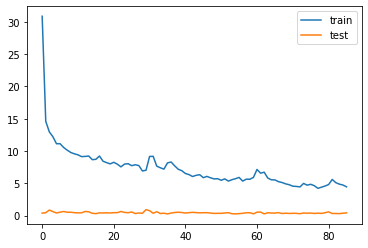

In [67]:
from keras.callbacks import EarlyStopping
from keras.models import load_model

model_06C = Sequential()
model_06C.add(Dense(477, input_dim = X_06C_train.shape[1], activation='selu'))
model_06C.add(Dense(477, activation='selu'))
model_06C.add(Dropout(0.4))
model_06C.add(Dense(477, activation='selu'))
model_06C.add(Dropout(0.4))
model_06C.add(Dense(477, activation='selu'))
model_06C.add(Dense(1, activation='sigmoid'))

model_06C.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=metrics,)


es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
mc = tf.keras.callbacks.ModelCheckpoint('best_model.h5', 
                                        monitor='val_loss', 
                                        mode='min', 
                                        verbose=1, 
                                        save_best_only=True)

history_06C = model_06C.fit(x=X_06C_train, 
                    y=y_06C_train, 
                    validation_data=(X_06C_val, y_06C_val),
                    epochs=300,
                    batch_size=2000,
                    class_weight=cw_06,
                    verbose=0,
                    callbacks=[es, mc]
                    )

saved_model_06C = load_model('best_model.h5')

plt.plot(history_06C.history['loss'], label='train')
plt.plot(history_06C.history['val_loss'], label='test')
plt.legend()
plt.show

The PR-AUC: 0.542


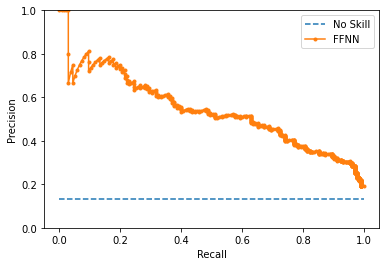

In [64]:
plot_PRC(y_06C_test,saved_model_06C.predict( X_06C_test), name='FFNN')

The eventhough the validation loss doesnt seem to decrease after the first epochs, the early-stopping callback shows the right moment to stop the training with the given patience. For the complete set of demographic features the right number epoch seems to differ little from  that of the models trained with a reduced number of demographic features.

F2: 0.6914941966678579
recall: 0.7054320987654321
precision: 0.6538716101429535
accuracy: 0.9098801425332037
The variance is: 0.00121374201738395


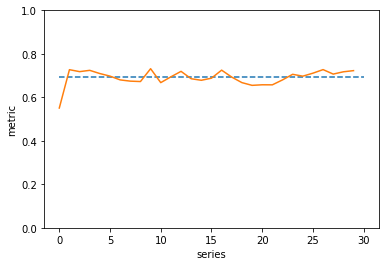

In [66]:
model = Sequential()
model.add(Dense(477, input_dim = X_06C_train.shape[1], activation='selu'))
model.add(Dense(477, activation='selu'))
model.add(Dropout(0.4))
model.add(Dense(477, activation='selu'))
model.add(Dropout(0.4))
model.add(Dense(477, activation='selu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=metrics,)

precision_06C = []
acc_06C = []
f2_06C = []
recall_06C = []
for i in range(30):

  history = model.fit(x=X_06C_train, 
                    y=y_06C_train, 
                    validation_data=(X_06C_val, y_06C_val),
                    epochs=50,
                    batch_size=2000,
                    class_weight=cw_06,
                    verbose=0,
                    )
                    
  f2_06C.append(met.fbeta_score(y_06C_test, model.predict(X_06C_test).round(), beta=2))
  recall_06C.append(met.recall_score(y_06C_test, model.predict(X_06C_test).round()))
  precision_06C.append(met.precision_score(y_06C_test, model.predict(X_06C_test).round()))
  acc_06C.append(met.accuracy_score(y_06C_test, model.predict(X_06C_test).round()))

print('F2: ' + str(statistics.mean(f2_06C)))
print('recall: ' + str(statistics.mean(recall_06C)))
print('precision: ' + str(statistics.mean(precision_06C)))
print('accuracy: ' + str(statistics.mean(acc_06C)))

plot_series(f2_06C)

The model trained and configured with the a reduced number of demographic features performes better than the complete version, just as it happened with the machine learning models. Overall, the performance regarding F2 and Recall is superior to the baseline (Logistic Regression) and SVM.

##  2011-2016 Gentrification Period <a name='2011_2016_model'></a>

In [40]:
reduced_11_16 = pd.read_csv('drive/MyDrive/dataset_reduced_11_16.csv')
complete_11_16 = pd.read_csv('drive/MyDrive/dataset_complete_11_16.csv')

In [41]:
# Normalize dataset
scaler_R = preprocessing.MinMaxScaler()
X_11R = reduced_11_16.drop(columns = ['Unnamed: 0','SA1_MAINCO','Gentrified_11_16'], axis=1)
X_11R[X_11R.columns] = scaler_R.fit_transform(X_11R)
                                               
scaler_C = preprocessing.MinMaxScaler()
X_11C = complete_11_16.drop(columns = ['Unnamed: 0','SA1_MAINCO','Gentrified_11_16'], axis=1)
X_11C[X_11C.columns] = scaler_C.fit_transform(X_11C)

# Split dataset
X_11R_select, X_11R_test, y_11R_select, y_11R_test = train_test_split(X_11R,
                                                                    reduced_11_16['Gentrified_11_16'], 
                                                                    test_size=0.10,
                                                                    random_state=0)
X_11R_train, X_11R_val, y_11R_train, y_11R_val = train_test_split(X_11R_select,
                                                                    y_11R_select, 
                                                                    test_size=0.111,
                                                                  random_state=0)

X_11C_select, X_11C_test, y_11C_select, y_11C_test = train_test_split(X_11C,
                                                                    complete_11_16['Gentrified_11_16'], 
                                                                    test_size=0.10,
                                                                    random_state=0)
X_11C_train, X_11C_val, y_11C_train, y_11C_val = train_test_split(X_11C_select,
                                                                    y_11C_select, 
                                                                    test_size=0.111,
                                                                  random_state=0)

In [42]:
# Class wights fixed to the proportion of positives and negtives

y_11 = reduced_11_16['Gentrified_11_16']
int_ratio_11 = round(100*len(y_11[y_11 == True])/ len(y_11))

cw_11 = {False: int_ratio_11, True: 100-int_ratio_11}

FFNN trained and configured with a reduced number of demographic features.

F2: 0.5616289694359605
recall: 0.6676923076923077
precision: 0.3684215013802628
accuracy: 0.8043083900226757
The variance is: 0.0002086905406897102


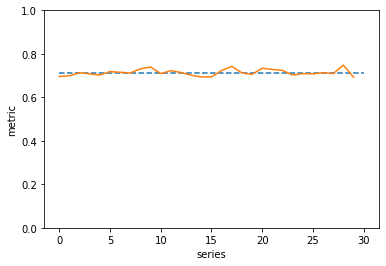

In [43]:
model = Sequential()
model.add(Dense(105, input_dim = X_11R_train.shape[1], activation='selu'))
model.add(Dense(105, activation='selu'))
model.add(Dropout(0.4))
model.add(Dense(105, activation='selu'))
model.add(Dropout(0.4))
model.add(Dense(105, activation='selu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=metrics,)

precision_11R = []
acc_11R = []
f2_11R = []
recall_11R = []
for i in range(10):

  history = model.fit(x=X_11R_select, 
                    y=y_11R_select, 
                    epochs=50,
                    batch_size=2000,
                    class_weight=cw_11,
                    verbose=0)
                    
  f2_11R.append(met.fbeta_score(y_11R_test, model.predict(X_11R_test).round(), beta=2))
  recall_11R.append(met.recall_score(y_11R_test, model.predict(X_11R_test).round()))
  precision_11R.append(met.precision_score(y_11R_test, model.predict(X_11R_test).round()))
  acc_11R.append(met.accuracy_score(y_11R_test, model.predict(X_11R_test).round()))

print('F2: ' + str(statistics.mean(f2_11R)))
print('recall: ' + str(statistics.mean(recall_11R)))
print('precision: ' + str(statistics.mean(precision_11R)))
print('accuracy: ' + str(statistics.mean(acc_11R)))

plot_series(f2_11R)

FFNN trained and configured with all demographic features.

F2: 0.3322427535533208
recall: 0.34690265486725663
precision: 0.2949149525489095
accuracy: 0.836767087787496
The variance is: 0.0032314725316097523


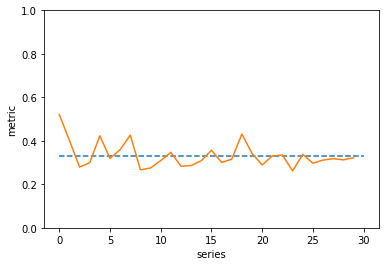

In [44]:
model = Sequential()
model.add(Dense(477, input_dim = X_11C_train.shape[1], activation='selu'))
model.add(Dense(477, activation='selu'))
model.add(Dropout(0.4))
model.add(Dense(477, activation='selu'))
model.add(Dropout(0.4))
model.add(Dense(477, activation='selu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=metrics,)

precision_11C = []
acc_11C = []
f2_11C = []
recall_11C = []
for i in range(30):

  history = model.fit(x=X_11C_train, 
                    y=y_11C_train, 
                    validation_data=(X_11C_val, y_11C_val),
                    epochs=50,
                    batch_size=2000,
                    class_weight=cw_11,
                    verbose=0,
                    )
                    
  f2_11C.append(met.fbeta_score(y_11C_test, model.predict(X_11C_test).round(), beta=2))
  recall_11C.append(met.recall_score(y_11C_test, model.predict(X_11C_test).round()))
  precision_11C.append(met.precision_score(y_11C_test, model.predict(X_11C_test).round()))
  acc_11C.append(met.accuracy_score(y_11C_test, model.predict(X_11C_test).round()))

print('F2: ' + str(statistics.mean(f2_11C)))
print('recall: ' + str(statistics.mean(recall_11C)))
print('precision: ' + str(statistics.mean(precision_11C)))
print('accuracy: ' + str(statistics.mean(acc_11C)))

plot_series(f2_11C)

Just like in the off-the-shelf machine learning models, the gentrification period between 2011 and 2016 shows a poorer performance.